<a href="https://colab.research.google.com/github/bilawalkhan55/Artificial-intelligence/blob/main/FuzzyReasoning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.6 MB/s eta 0:00:00
New Tip Output: 18.74
New Brake Output: 52.36


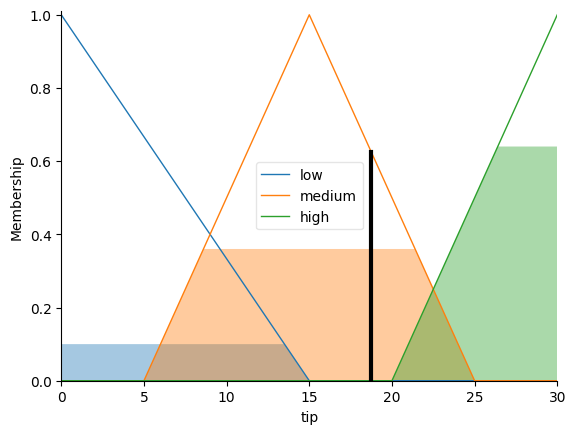

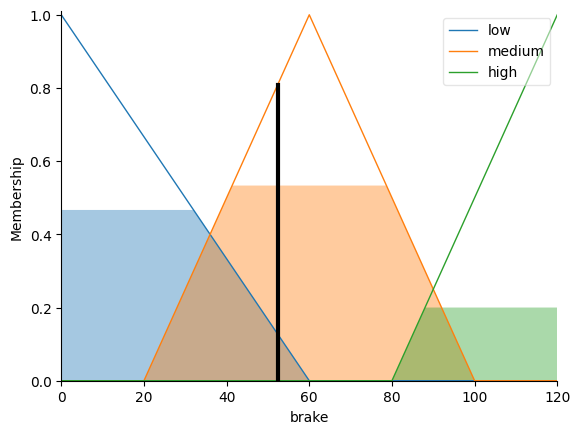

In [2]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ---------------------------------------------
# Restaurant Tipping System (Reproduced + New Data)
# ---------------------------------------------
def restaurant_tipping():
    # Define input and output variables
    service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
    food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
    tip = ctrl.Consequent(np.arange(0, 31, 1), 'tip')

    # Membership functions
    service.automf(3)
    food.automf(3)

    tip['low'] = fuzz.trimf(tip.universe, [0, 0, 15])
    tip['medium'] = fuzz.trimf(tip.universe, [5, 15, 25])
    tip['high'] = fuzz.trimf(tip.universe, [20, 30, 30])

    # Fuzzy rules
    rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
    rule2 = ctrl.Rule(service['average'], tip['medium'])
    rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

    # Control system
    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

    # New inputs
    tipping.input['service'] = 8.2
    tipping.input['food'] = 4.5

    tipping.compute()

    print(f"New Tip Output: {tipping.output['tip']:.2f}")
    tip.view(sim=tipping)


# ---------------------------------------------
# ABS Brake System (Reproduced + New Data)
# ---------------------------------------------
def abs_brake_system():
    # Define inputs and output
    speed = ctrl.Antecedent(np.arange(0, 151, 1), 'speed')
    slip = ctrl.Antecedent(np.arange(0, 16, 1), 'slip')
    brake = ctrl.Consequent(np.arange(0, 121, 1), 'brake')

    # Membership functions
    speed.automf(3)
    slip.automf(3)

    brake['low'] = fuzz.trimf(brake.universe, [0, 0, 60])
    brake['medium'] = fuzz.trimf(brake.universe, [20, 60, 100])
    brake['high'] = fuzz.trimf(brake.universe, [80, 120, 120])

    # Rules
    rule1 = ctrl.Rule(speed['poor'] | slip['poor'], brake['high'])
    rule2 = ctrl.Rule(speed['average'], brake['medium'])
    rule3 = ctrl.Rule(speed['good'] | slip['good'], brake['low'])

    # Control system
    braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    braking = ctrl.ControlSystemSimulation(braking_ctrl)

    # New inputs
    braking.input['speed'] = 110
    braking.input['slip'] = 6

    braking.compute()

    print(f"New Brake Output: {braking.output['brake']:.2f}")
    brake.view(sim=braking)


# Run both systems
restaurant_tipping()
abs_brake_system()
plt.show()